## TEXT CLASSIFICATION AND SENTIMENT ANALYSIS

Improving Customer Satisfaction through Automated Review Sentiment Analysis
Overview
You are a product manager at an e-commerce company like Amazon. Your company receives thousands of customer reviews daily for various products. While ratings are available, they don’t always capture customer sentiment accurately — especially when the text and rating conflict.
Business Problem:
Your goal is to build an automated Sentiment Analysis System to classify incoming product reviews as Positive or Negative. This will help:
•	Monitor product performance in real-time
•	Identify products with sudden spikes in negative feedback
•	Improve customer satisfaction by addressing complaints faster

Dataset
•	Each row is one Amazon customer review for some product.
•	The dataset has been pre-labeled — so you already know if the review is positive or negative.
•	This is a typical sentiment analysis dataset, often used for training or testing natural language processing (NLP) models.
📊 Rows:
10,000 customer reviews
📑 Columns:
1.	label
o	Type: Text (Categorical)
o	Values: pos (positive) or neg (negative)
o	What it means: The sentiment of the review — whether the customer’s feedback is positive or negative.
2.	review
o	Type: Text
o	Values: Actual text of the review written by the customer.
o	What it means: What the customer said about the product in their own words — for example: “Excellent Soundtrack! I love it!”

Tasks
Data Cleaning: Remove duplicates, handle missing reviews if any, preprocess text (lowercasing, stopwords removal).
Exploratory Analysis: Word clouds, sentiment distribution, most common positive/negative words.
Model Development: Use NLP techniques (TF-IDF, Word2Vec, or BERT embeddings) with models like Logistic Regression, SVM, or Neural Networks.
Validation: Use train/test split, cross-validation, and metrics like accuracy, F1-score.


Submission Guidelines
•	Your submission should include a comprehensive report and the complete codebase.
•	Your code should be well-documented and include comments explaining the major steps.
Evaluation Criteria
•	Correct implementation of data preprocessing and feature extraction.
•	Accuracy and robustness of the classification model.
•	Depth and insightfulness of the sentiment analysis.
•	Clarity and thoroughness of the evaluation and discussion sections.
•	Overall quality and organization of the report and code.
Good luck, and we look forward to your insightful analysis of the given dataset!


## Import The Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re
from cleantext import clean

plt.rcParams['figure.figsize'] =(10, 5)
plt.rcParams['figure.dpi']=300

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

### Load the data

In [ ]:
data=pd.read_csv("amazonreviews.tsv", sep='\t')
data.head()

label                                             review
0   pos  Stuning even for the non-gamer: This sound tra...
1   pos  The best soundtrack ever to anything.: I'm rea...
2   pos  Amazing!: This soundtrack is my favorite music...
3   pos  Excellent Soundtrack: I truly like this soundt...
4   pos  Remember, Pull Your Jaw Off The Floor After He...

### EDA and Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [ ]:
#Check for any null values presence
data.isnull().sum()

label     0
review    0
dtype: int64

In [ ]:
#Duplicate values
data.duplicated().sum()

np.int64(0)

In [ ]:
data.describe()

label                                             review
count   10000                                              10000
unique      2                                              10000
top       neg  Early Hopkins story still sends chills through...
freq     5097                                                  1

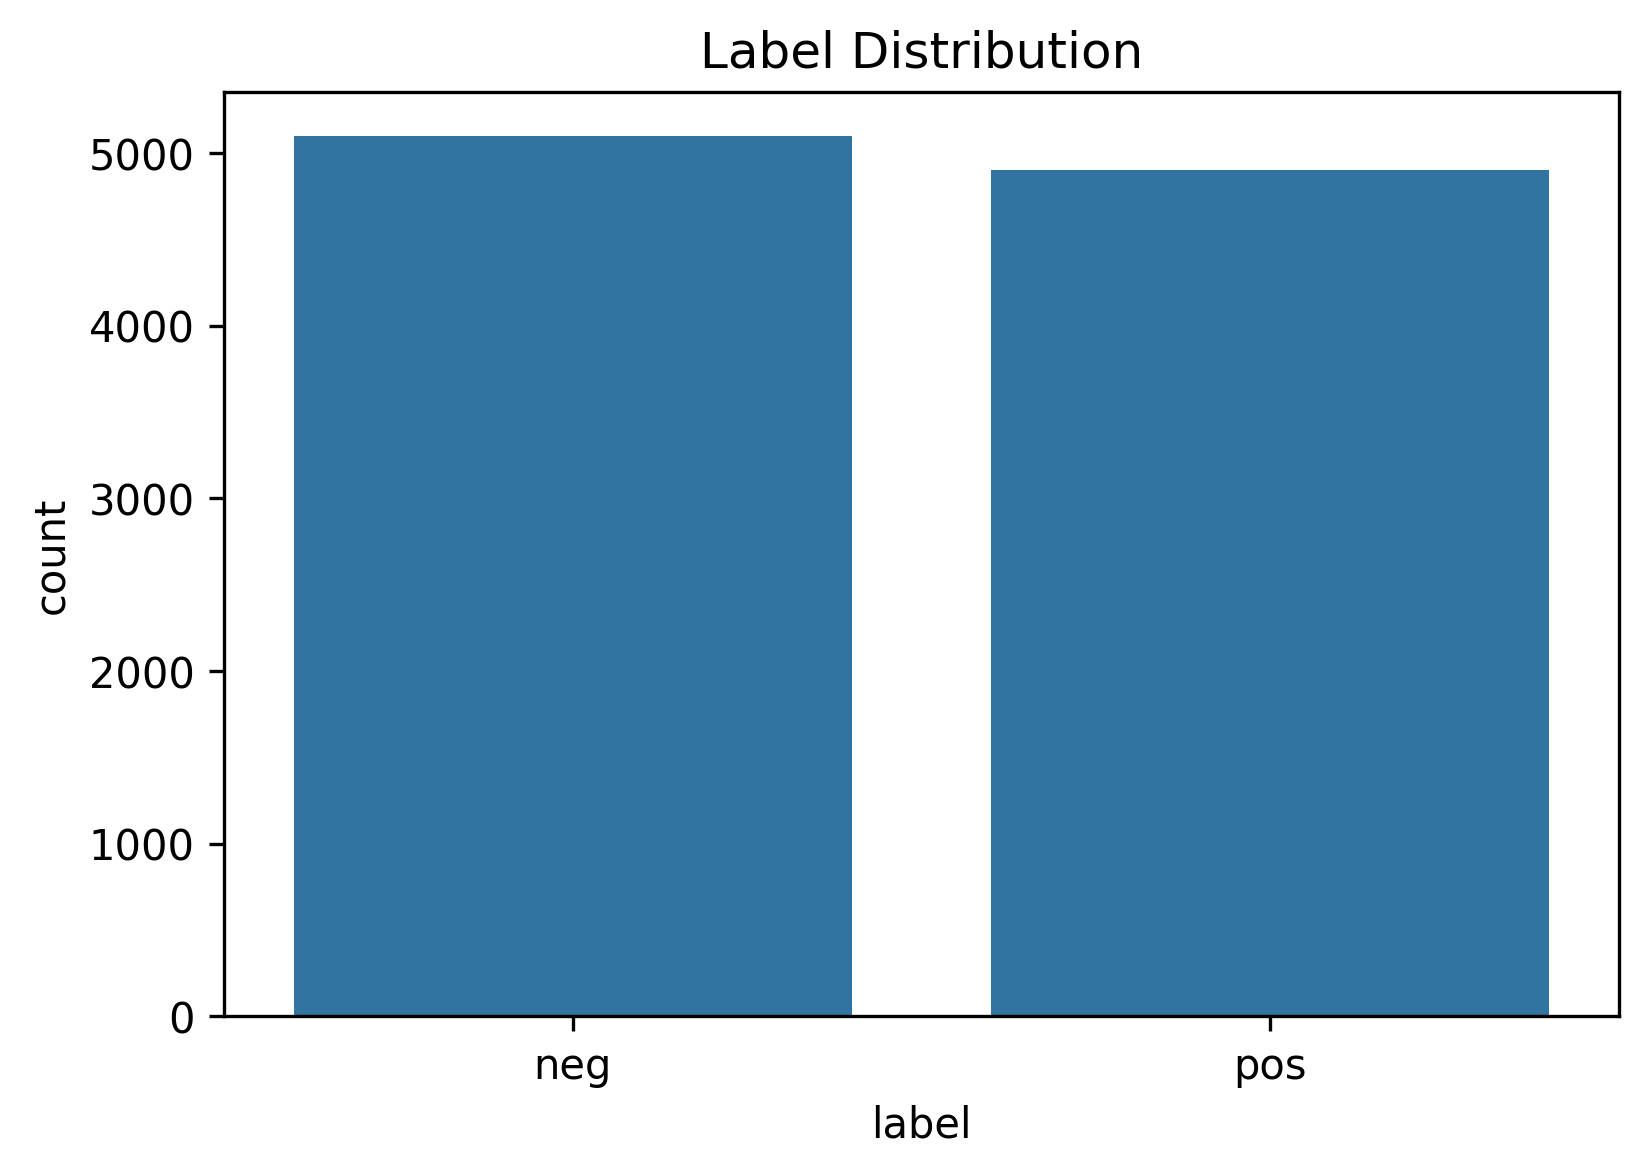

In [ ]:
#Countplot for Labels
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data, order=data['label'].value_counts().index)
plt.title('Label Distribution')
plt.show()

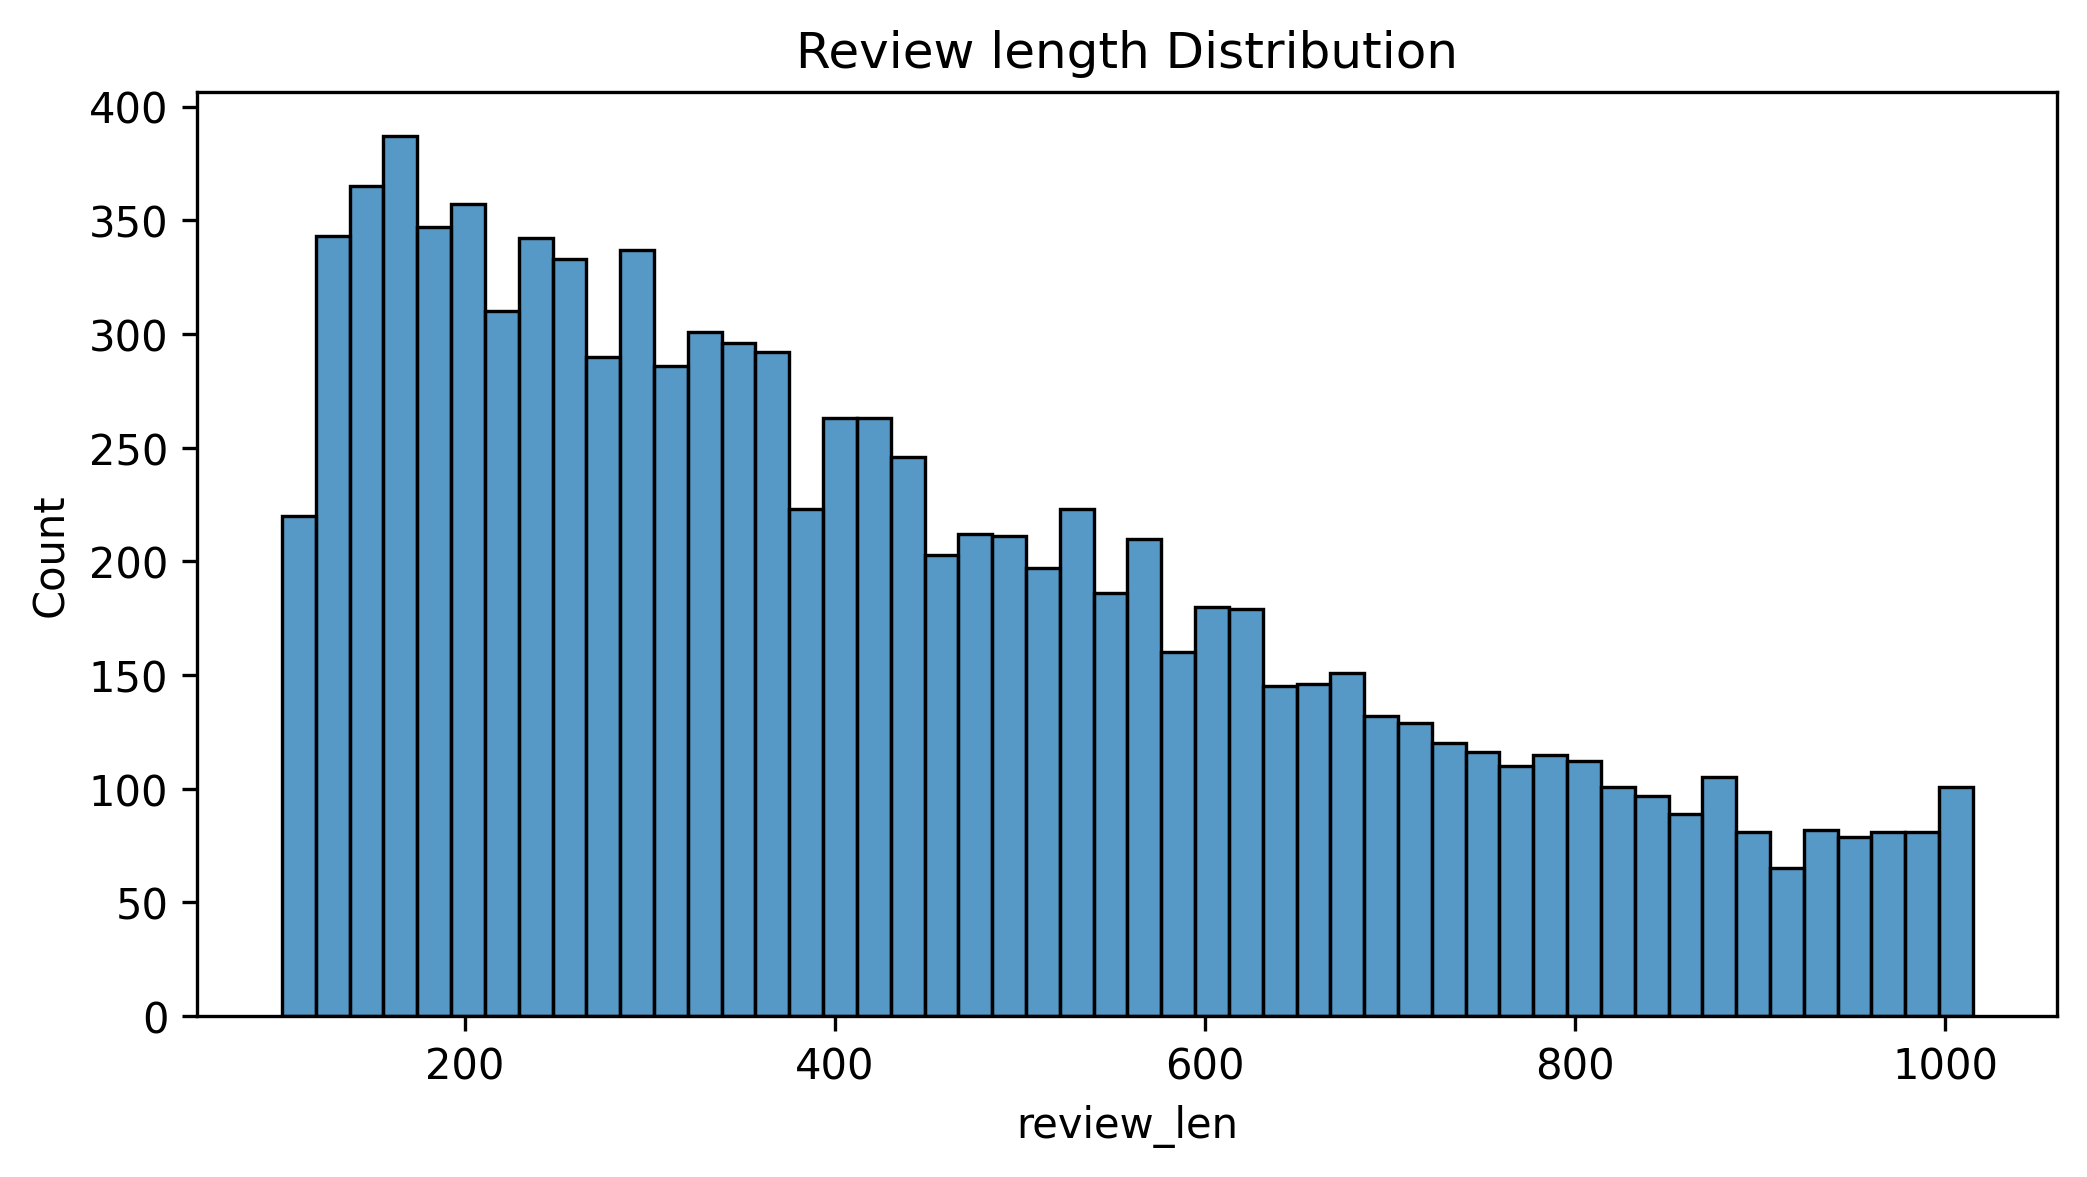

In [ ]:
#Review Length
data['review_len']=data['review'].str.len()
plt.figure(figsize=(8, 4))
sns.histplot(data['review_len'], bins=50)
plt.title('Review length Distribution')
plt.show()

In [ ]:
# Encoding of labels
data['nlabel']=data['label'].map({'pos':1, 'neg':0})
data

label                                             review  review_len  \
0      pos  Stuning even for the non-gamer: This sound tra...         426   
1      pos  The best soundtrack ever to anything.: I'm rea...         509   
2      pos  Amazing!: This soundtrack is my favorite music...         760   
3      pos  Excellent Soundtrack: I truly like this soundt...         743   
4      pos  Remember, Pull Your Jaw Off The Floor After He...         481   
...    ...                                                ...         ...   
9995   pos  A revelation of life in small town America in ...         867   
9996   pos  Great biography of a very interesting journali...         861   
9997   neg  Interesting Subject; Poor Presentation: You'd ...         650   
9998   neg  Don't buy: The box looked used and it is obvio...         135   
9999   pos  Beautiful Pen and Fast Delivery.: The pen was ...         536   

      nlabel  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
9995       1  
9996       1  
9997       0  
9998       0  
9999       1  

[10000 rows x 4 columns]

In [ ]:
# Positive and Negative Reviews
pos=data[data['label']=='pos']
neg=data[data['label']=='neg']


In [ ]:
def wcloud(data,heading):
    txt = ' '.join(data['review'])
    wc = WordCloud(background_color='Black',width=500, height=200,
                  colormap='rainbow').generate(txt)
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(heading, fontsize=16, weight='bold')

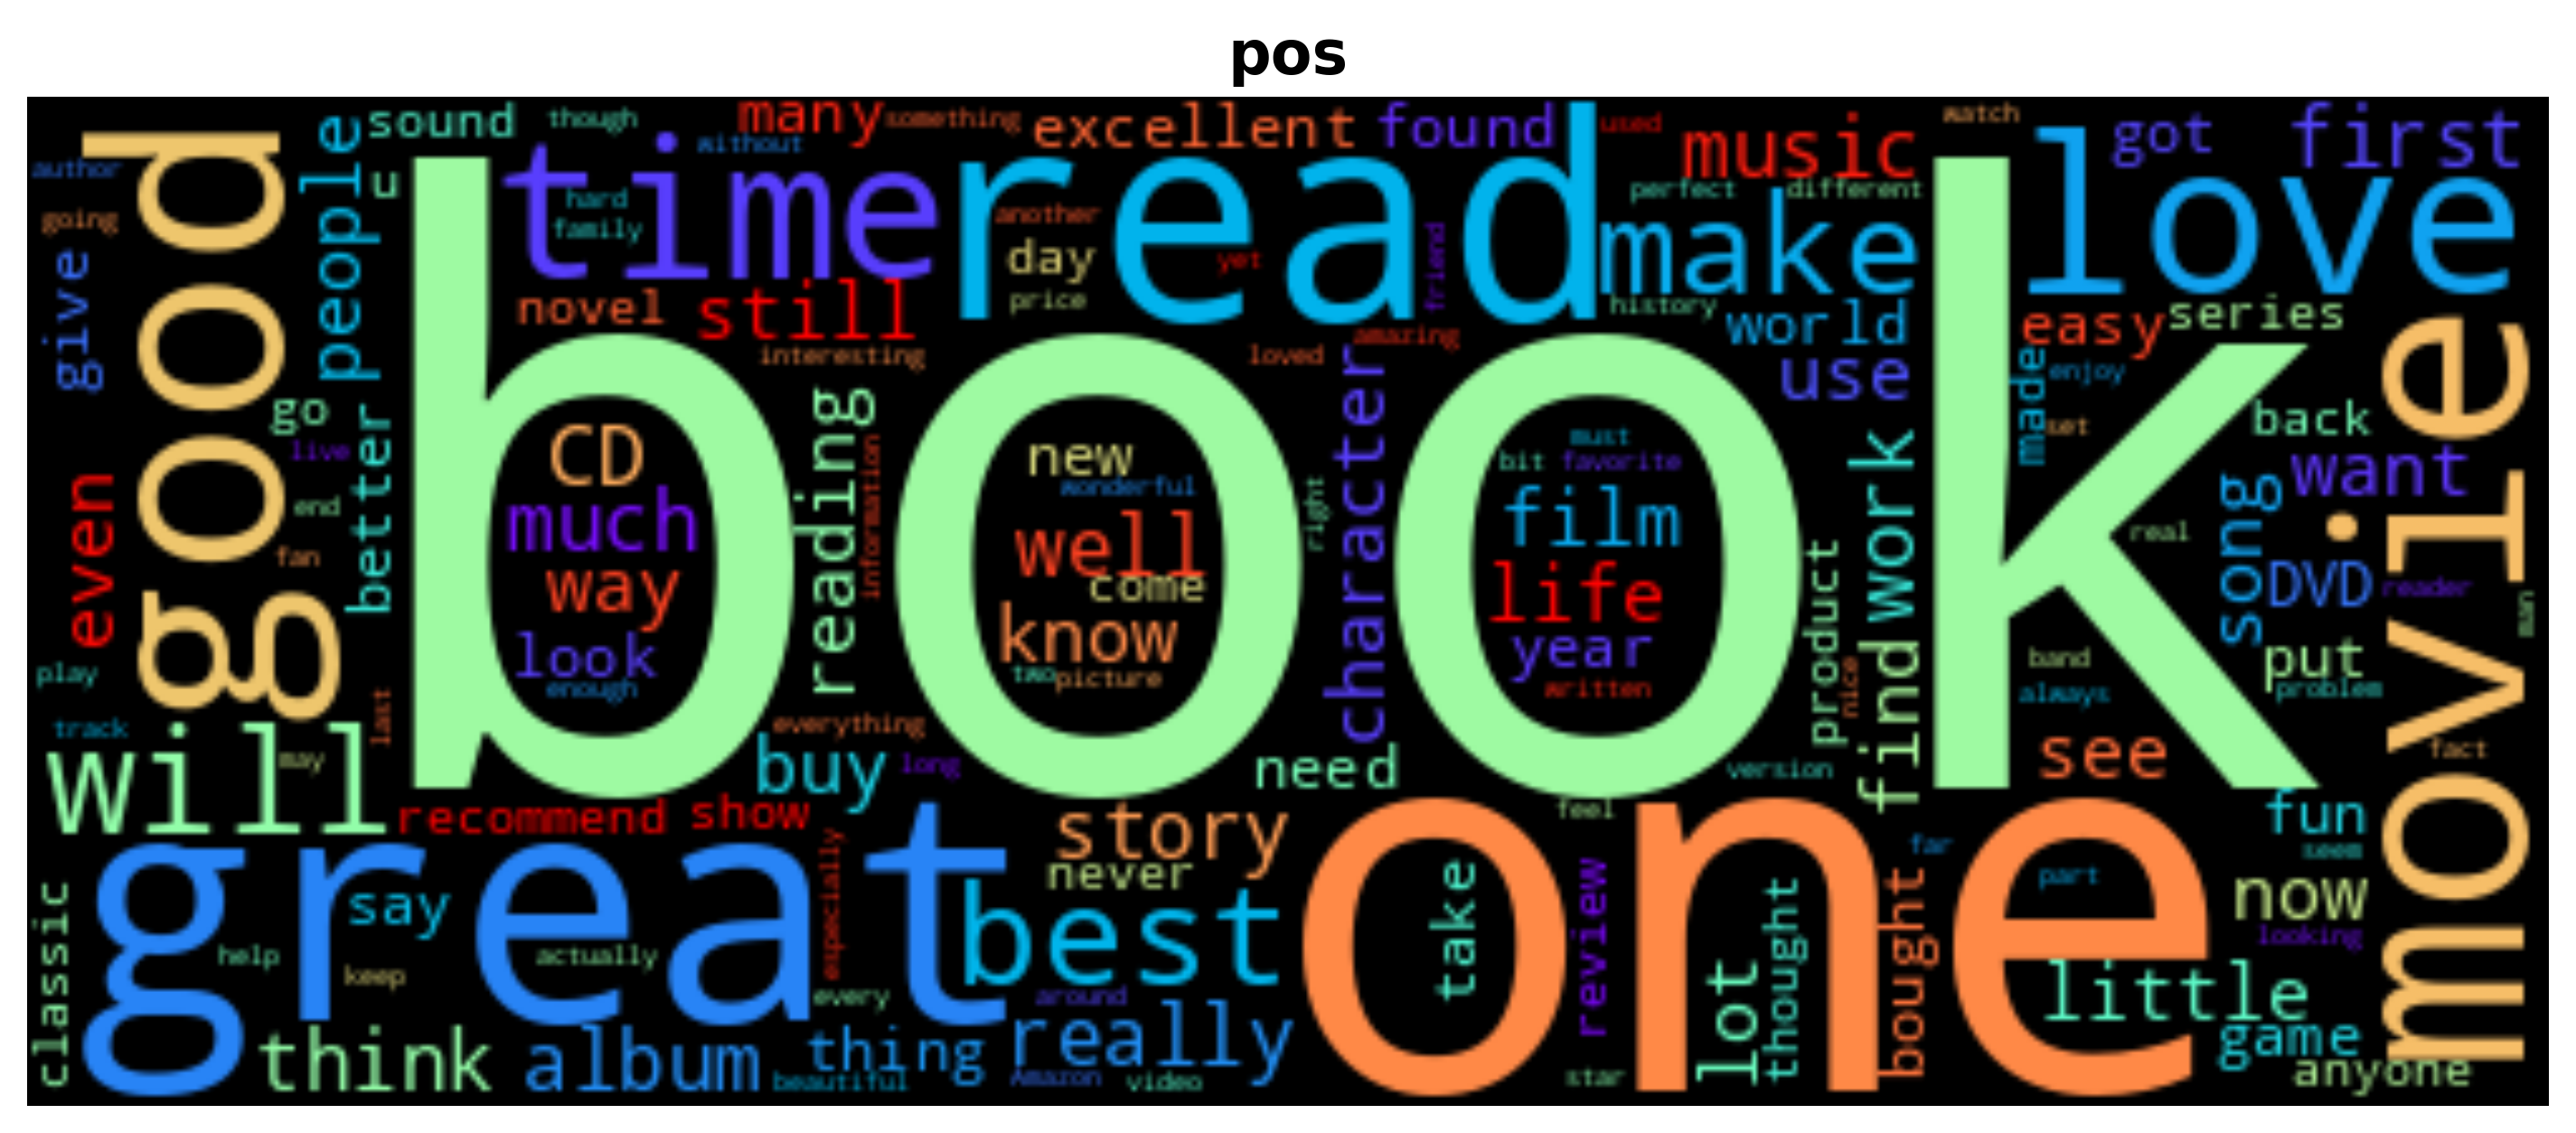

In [ ]:
wcloud(pos,'pos')
plt.show()

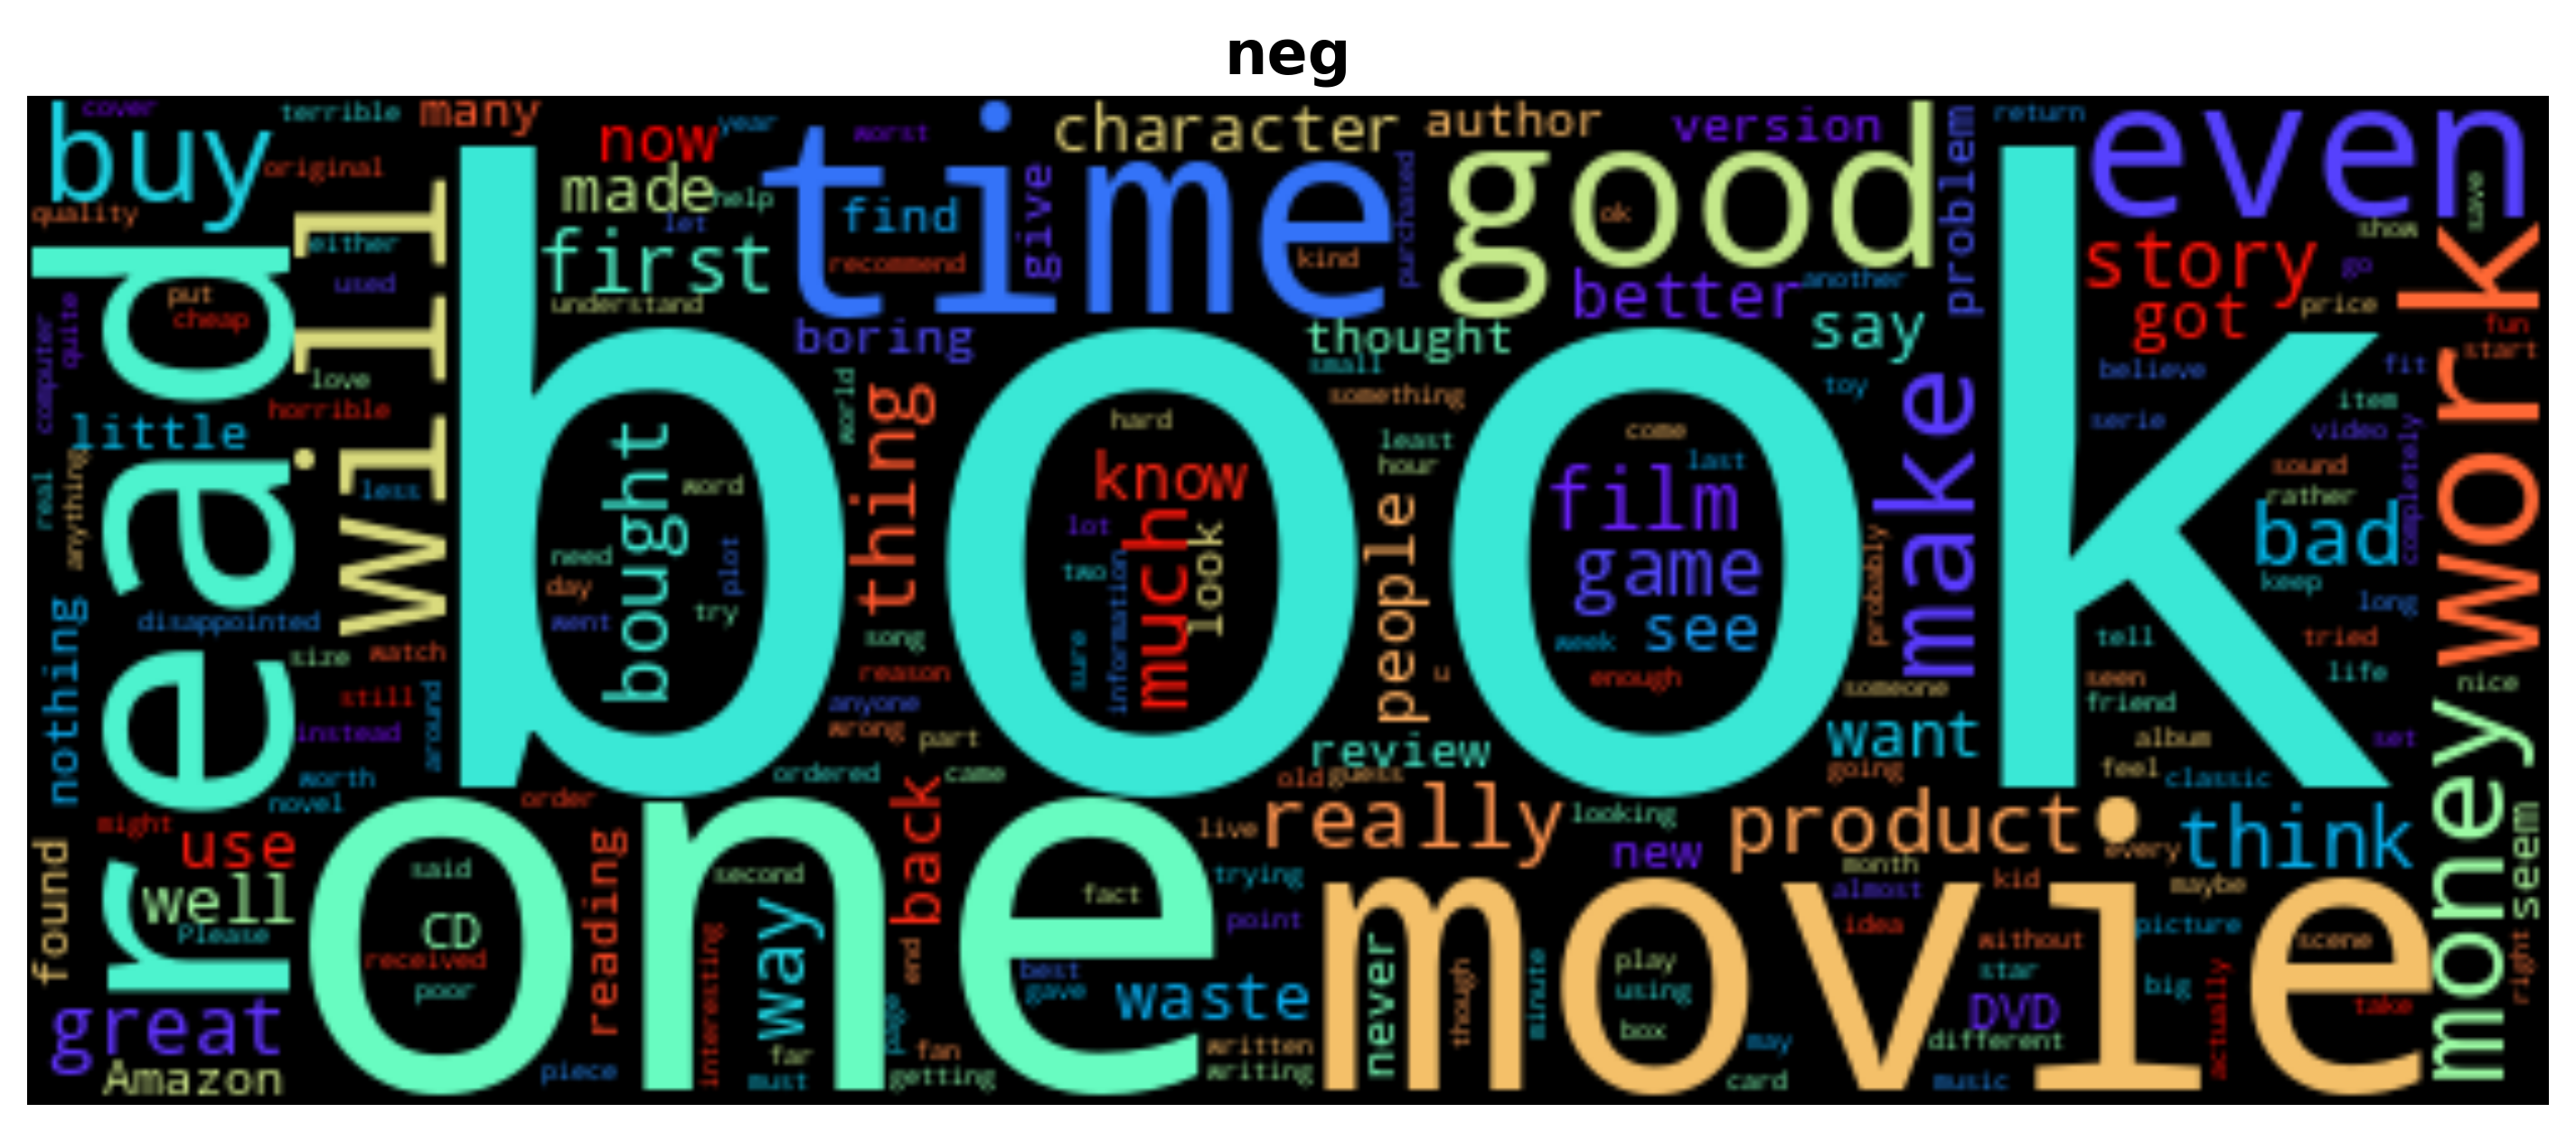

In [ ]:
wcloud(neg, 'neg')
plt.show()

In [ ]:
pos['review']

0       Stuning even for the non-gamer: This sound tra...
1       The best soundtrack ever to anything.: I'm rea...
2       Amazing!: This soundtrack is my favorite music...
3       Excellent Soundtrack: I truly like this soundt...
4       Remember, Pull Your Jaw Off The Floor After He...
                              ...                        
9990    Psychological thriller!: This movie really sca...
9991    A little more money than what I expected to sp...
9995    A revelation of life in small town America in ...
9996    Great biography of a very interesting journali...
9999    Beautiful Pen and Fast Delivery.: The pen was ...
Name: review, Length: 4903, dtype: object

In [ ]:
lemma=WordNetLemmatizer()
data['review'][0]

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [ ]:
range(len(data))

range(0, 10000)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
corpus=[]
text=data[['review']]
for i in range(len(data)):
    msg=re.sub(r'[^a-zA-Z]',' ', data['review'].iloc[i])
    msg=msg.lower()
    msg=msg.split() #word tokenize
    msg=[lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')] #Lemmatization
    msg=' '.join(msg) #join sentences
    corpus.append(msg)

In [ ]:
stemmer=PorterStemmer()
stemmer.stem('stunning')

'stun'

In [ ]:
stemmer.stem('interesting')

'interest'

In [ ]:
corpus

['stuning even non gamer sound track beautiful paint senery mind well would recomend even people hate vid game music played game chrono cross game ever played best music back away crude keyboarding take fresher step grate guitar soulful orchestra would impress anyone care listen',
 'best soundtrack ever anything reading lot review saying best game soundtrack figured write review disagree bit opinino yasunori mitsuda ultimate masterpiece music timeless listening year beauty simply refuse fade price tag pretty staggering must say going buy cd much money one feel would worth every penny',
 'amazing soundtrack favorite music time hand intense sadness prisoner fate mean played game hope distant promise girl stole star important inspiration personally throughout teen year higher energy track like chrono cross time scar time dreamwatch chronomantique indefinably remeniscent chrono trigger absolutely superb well soundtrack amazing music probably best composer work heard xenogears soundtrack sa

In [ ]:
 import nltk
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#Word Tokenization
for i in corpus:
    words = word_tokenize(i)
    for i in words:
        print(i)

Streaming output truncated to the last 5000 lines.
really
good
thing
good
bad
run
positive
negative
side
setting
underground
cave
couple
moment
make
jump
great
concept
side
story
cast
troll
creature
tried
take
seriously
review
wrong
film
note
review
posted
completely
different
movie
descent
horror
movie
descent
please
check
movie
posting
post
review
descent
almost
full
hour
movie
see
movie
even
supposed
basically
chick
flick
mutant
last
minute
horror
movie
suspense
right
guess
new
style
horror
stick
halloween
exorcist
texas
chainsaw
massacre
basically
young
woman
go
mountain
romp
around
together
trying
help
one
friend
loss
family
consists
first
minute
movie
finally
go
cave
another
minute
see
chasing
wanting
kill
mutant
actually
pretty
neat
see
much
like
sweet
home
alabama
meet
gargoyle
going
advertise
movie
scary
horror
make
like
one
chick
flick
boo
tossed
towards
end
stay
away
failed
flick
chick
accent
america
movie
little
dated
sure
scared
every
loving
jesus
folk
came
said
still
scar

In [ ]:
corpus

['stuning even non gamer sound track beautiful paint senery mind well would recomend even people hate vid game music played game chrono cross game ever played best music back away crude keyboarding take fresher step grate guitar soulful orchestra would impress anyone care listen',
 'best soundtrack ever anything reading lot review saying best game soundtrack figured write review disagree bit opinino yasunori mitsuda ultimate masterpiece music timeless listening year beauty simply refuse fade price tag pretty staggering must say going buy cd much money one feel would worth every penny',
 'amazing soundtrack favorite music time hand intense sadness prisoner fate mean played game hope distant promise girl stole star important inspiration personally throughout teen year higher energy track like chrono cross time scar time dreamwatch chronomantique indefinably remeniscent chrono trigger absolutely superb well soundtrack amazing music probably best composer work heard xenogears soundtrack sa

### BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus)
x

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 340335 stored elements and shape (10000, 27386)>

In [ ]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
cv.vocabulary_

{'stuning': 23338,
 'even': 8355,
 'non': 16412,
 'gamer': 9958,
 'sound': 22586,
 'track': 24782,
 'beautiful': 2120,
 'paint': 17299,
 'senery': 21456,
 'mind': 15378,
 'well': 26623,
 'would': 27065,
 'recomend': 19677,
 'people': 17655,
 'hate': 11037,
 'vid': 26142,
 'game': 9948,
 'music': 15945,
 'played': 18117,
 'chrono': 4140,
 'cross': 5567,
 'ever': 8364,
 'best': 2327,
 'back': 1823,
 'away': 1749,
 'crude': 5588,
 'keyboarding': 13341,
 'take': 23888,
 'fresher': 9715,
 'step': 23076,
 'grate': 10558,
 'guitar': 10748,
 'soulful': 22579,
 'orchestra': 16940,
 'impress': 12049,
 'anyone': 1092,
 'care': 3535,
 'listen': 14149,
 'soundtrack': 22601,
 'anything': 1095,
 'reading': 19527,
 'lot': 14345,
 'review': 20418,
 'saying': 21102,
 'figured': 9137,
 'write': 27105,
 'disagree': 6699,
 'bit': 2452,
 'opinino': 16887,
 'yasunori': 27195,
 'mitsuda': 15533,
 'ultimate': 25260,
 'masterpiece': 14879,
 'timeless': 24523,
 'listening': 14154,
 'year': 27205,
 'beauty': 2123

In [ ]:
cv.get_feature_names_out()

array(['aa', 'aaa', 'aaaarrrggggghhhhhh', ..., 'zzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'],
      dtype=object)

## Model Building

### Feature Extraction

### Tf-IDF

In [ ]:
y=data['label']
y

0       pos
1       pos
2       pos
3       pos
4       pos
       ... 
9995    pos
9996    pos
9997    neg
9998    neg
9999    pos
Name: label, Length: 10000, dtype: object

In [ ]:
tf=TfidfVectorizer()

x_data=tf.fit_transform(corpus)
x_data=x_data.toarray()
x_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
corpus[0]

'stuning even non gamer sound track beautiful paint senery mind well would recomend even people hate vid game music played game chrono cross game ever played best music back away crude keyboarding take fresher step grate guitar soulful orchestra would impress anyone care listen'

In [ ]:
corpus[5]

'absolute masterpiece quite sure actually taking time read played game least heard least track whether aware mitsuda music contributed greatly mood every single minute whole game composed cd quite song exact count heart rendering impressively remarkable soundtrack one assure forget everything every listener fast paced energetic dancing tokage termina home slower haunting dragon god purely beautifully composed time scar even fantastic vocal radical dreamer one best videogame soundtrack surely mitsuda best ever'

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x_data, y, test_size=0.2, random_state=1)

--- Logistic Regression ---
  Train Accuracy: 0.9340
  Test Accuracy:  0.8500
  Test Precision: 0.8590
  Test Recall:    0.8403
  Test F1-Score:  0.8495


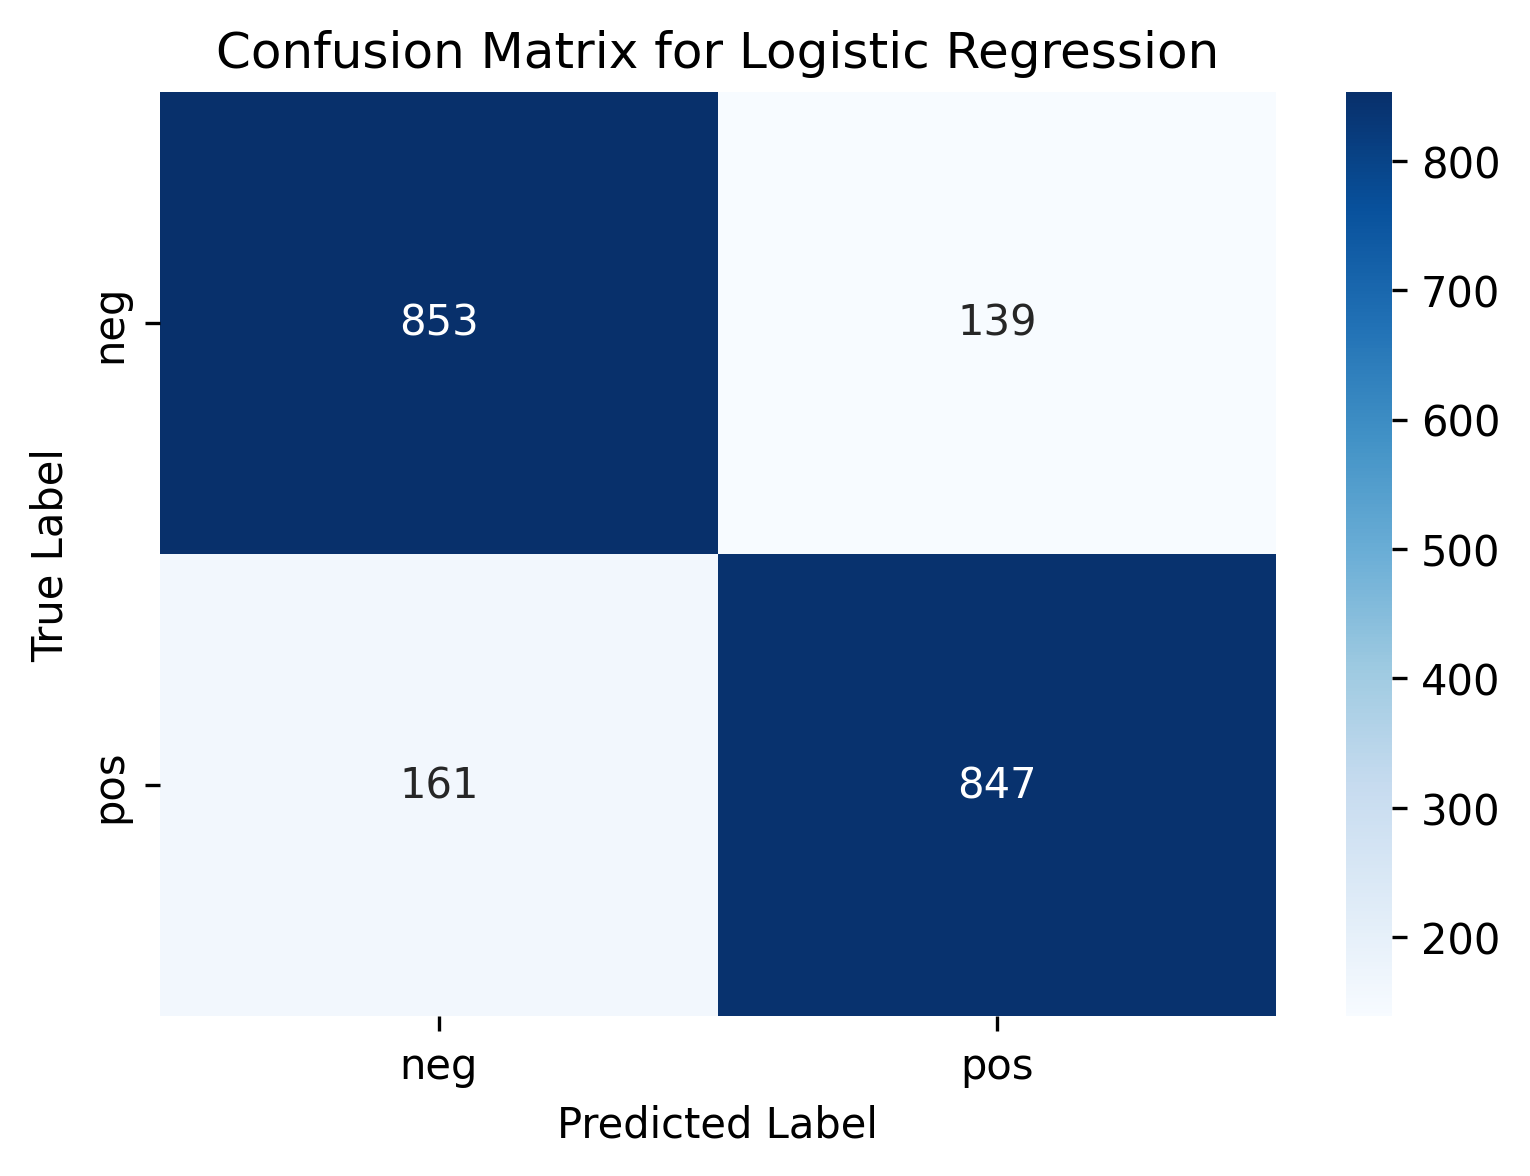



--- SVM ---
  Train Accuracy: 0.9644
  Test Accuracy:  0.8470
  Test Precision: 0.8482
  Test Recall:    0.8482
  Test F1-Score:  0.8482


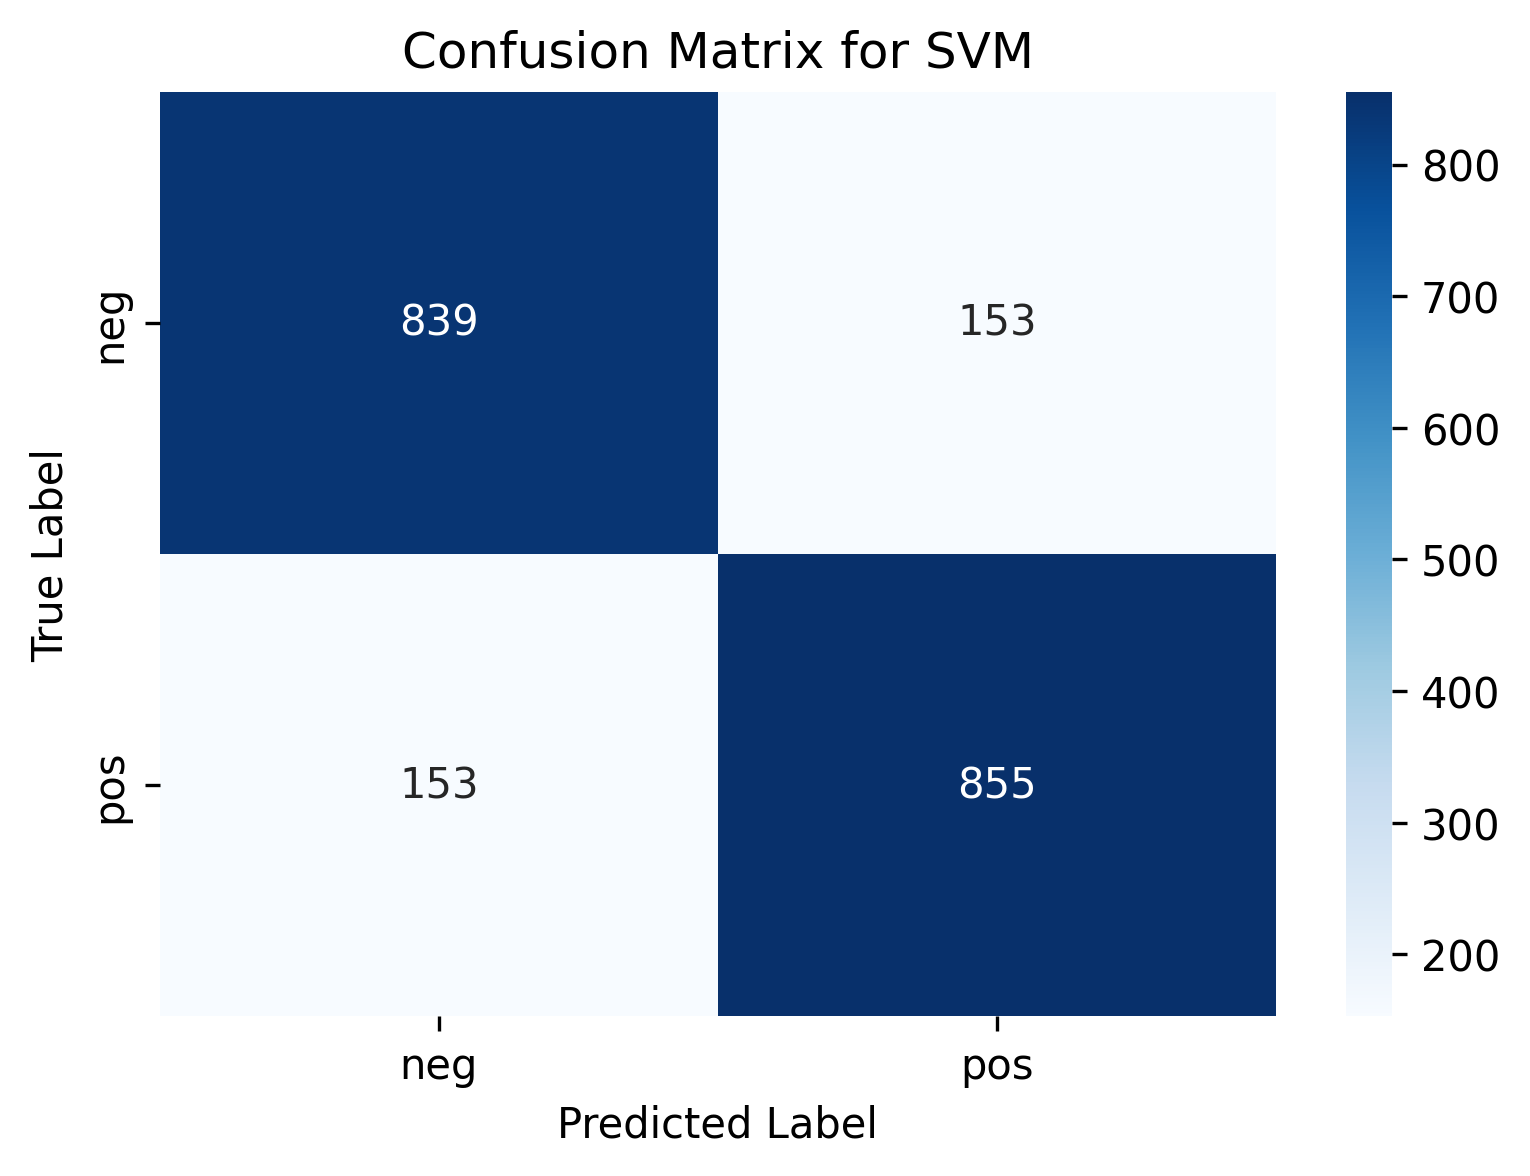



--- Neural Network ---
  Train Accuracy: 1.0000
  Test Accuracy:  0.8220
  Test Precision: 0.8280
  Test Recall:    0.8165
  Test F1-Score:  0.8222


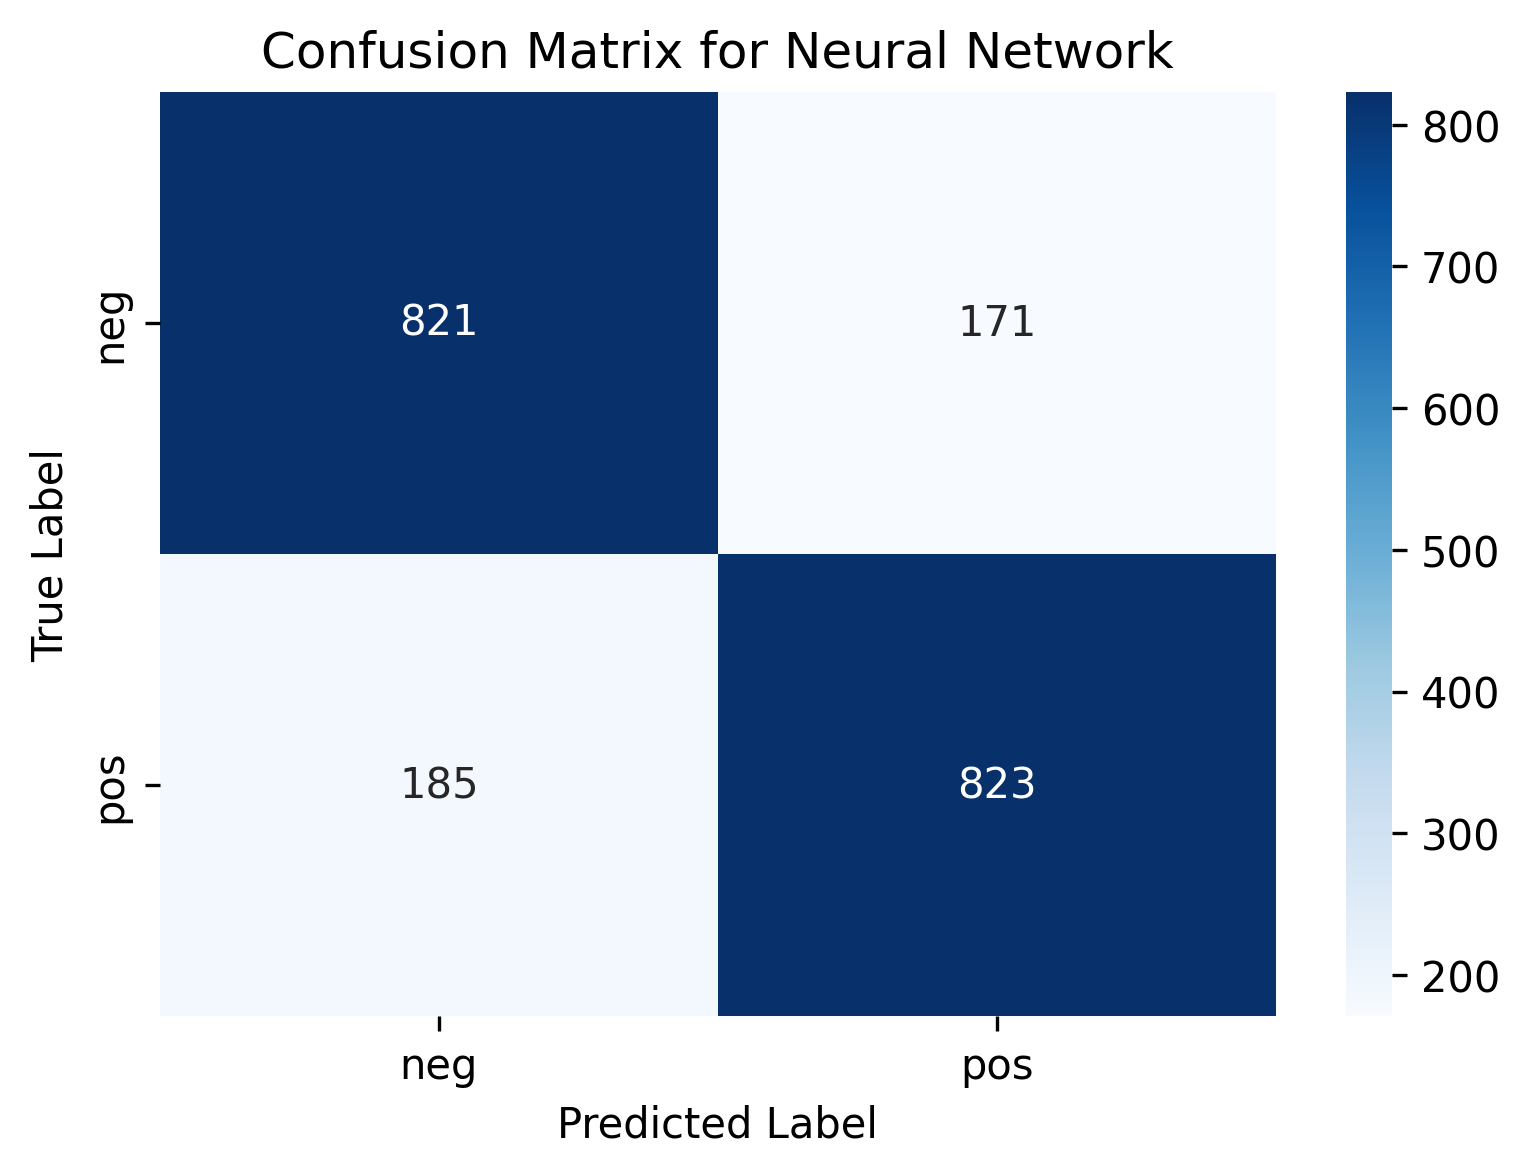

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42),
    "SVM": SVC(kernel='linear', degree=2, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train and evaluate
for name, model in models.items():
    model.fit(x_train, y_train)
    ypred_train = model.predict(x_train)
    ypred_test = model.predict(x_test)

    print(f"--- {name} ---")
    print(f"  Train Accuracy: {accuracy_score(y_train, ypred_train):.4f}")
    print(f"  Test Accuracy:  {accuracy_score(y_test, ypred_test):.4f}")
    print(f"  Test Precision: {precision_score(y_test, ypred_test, pos_label='pos'):.4f}")
    print(f"  Test Recall:    {recall_score(y_test, ypred_test, pos_label='pos'):.4f}")
    print(f"  Test F1-Score:  {f1_score(y_test, ypred_test, pos_label='pos'):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, ypred_test, labels=['neg', 'pos'])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['neg', 'pos'], yticklabels=['neg', 'pos'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    print("\n")